   # Lending Club: EDA Case Study

### What is Lending Club

Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. 








### How Lending Club works!

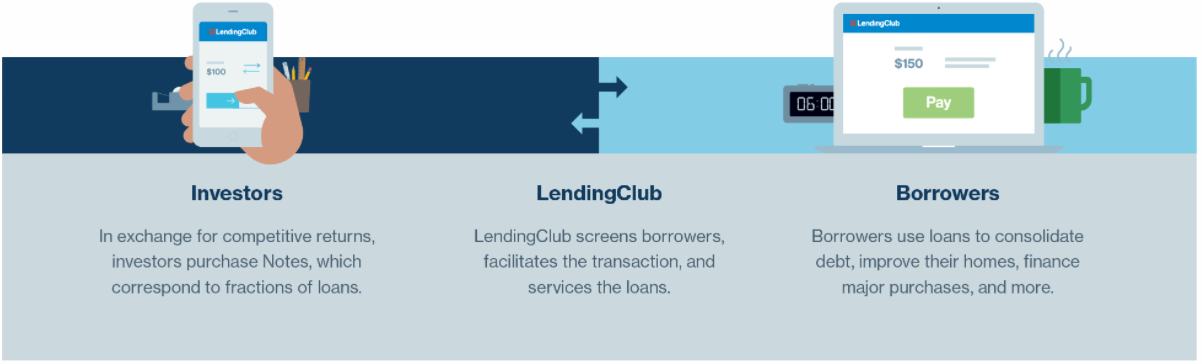

### Scenario

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


### Case Study

If one is able to identify the risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.


### Objective

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilize this knowledge for its portfolio and risk assessment.

---

                                                    Let's Work

## Data Understanding:

In [167]:
# Importing some important Library which will be used in this case study

import pandas as pd  # Pandas Library for working on Data Frame
import numpy as np   # Numpy will be used for Mathematics
import matplotlib.pyplot as plt # Matplotlib is used for Visualiziation
import seaborn as sns # Seaborn toghether with Matplotlib enhance the graphs
import datetime as dt # For Date and Time columns

In [168]:
df = pd.read_csv('loan.csv' , low_memory=False)

#To avoid Low_memory warning we use low_memory=False
#Low_memory warning is due to guessing dtypes for each column which is very memory demanding.


In [169]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as poss...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [171]:
df.shape

(39717, 111)

In [172]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [173]:
# Observation:
# Many columns having NaN values
# Most of the columns will not be used for analysis

# Column dictionary is avalible to understand the columns
pd.set_option('max_colwidth', 400) # to increase the column width
pd.set_option('max_rows' , None) # display all rows
df_dict = pd.read_excel('Data_Dictionary.xlsx' , index_col='LoanStatNew')
df_dict



,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan application
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by the borrower during registration.
annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
avg_cur_bal,Average current balance of all accounts
bc_open_to_buy,Total open to buy on revolving bankcards.


## Data Cleaning:


- check and removing null values in rows and columns
- check and removing for duplicate rows




In [174]:

# df.columns is not displaying all column names
# create for loop to iterate on column names and append in list

l = []
for i in df.columns:
    l.append(i)
print(l)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [175]:
# check for null values and sum it

df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [176]:
df.columns[df.isnull().all()] # select only those columns which contains all null values

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [177]:
df = df[df.columns[~df.isnull().all()]]  # droping all the null value column by ~ operator

In [178]:
df.shape # checking shape after removing null columns

(39717, 57)

In [179]:
# checking column which have single value.
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('**********************************************************\n\n')

id
[1077501 1077430 1077175 ...   90395   90376   87023]
**********************************************************


member_id
[1296599 1314167 1313524 ...   90390   89243   86999]
**********************************************************


loan_amnt
[ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800  9750 15550 17000  7500  5800  8050
  5400  4125  980

[5833.84 1008.71 3005.67 ... 1397.12  672.66  980.83]
**********************************************************


total_rec_prncp
[ 5000.     456.46  2400.   ...  2886.21   544.02 16077.42]
**********************************************************


total_rec_int
[ 863.16  435.17  605.67 ... 1413.49  174.2  1695.26]
**********************************************************


total_rec_late_fee
[ 0.         16.97       15.00000003 ...  1.69        1.36
 19.89      ]
**********************************************************


recoveries
[  0.   117.08 189.06 ... 304.2   35.7   21.29]
**********************************************************


collection_recovery_fee
[0.0000e+00 1.1100e+00 2.0900e+00 ... 6.6836e+02 4.4425e+02 2.3000e-01]
**********************************************************


last_pymnt_d
['Jan-15' 'Apr-13' 'Jun-14' 'May-16' 'Apr-12' 'Nov-12' 'Jun-13' 'Sep-13'
 'Jul-12' 'Oct-13' 'May-13' 'Feb-15' 'Aug-15' 'Oct-12' 'Sep-12' nan
 'Dec-12' 'Dec-14' 'Aug-13' 'Nov-13

In [180]:
# dropping columns which have single value

single_val_col = ['tax_liens' , 'delinq_amnt' , 'chargeoff_within_12_mths' , 'application_type', 'policy_code',
                 'collections_12_mths_ex_med' ,'initial_list_status' , 'pymnt_plan','acc_now_delinq' ]

df.drop(single_val_col , axis=1 , inplace=True) # droping single variable columns



In [181]:
df.shape

(39717, 48)

In [182]:
df.columns # checking column name

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [183]:
# Now removing unnecessary columns whihc are not play any role in our analysis

#The loan_amnt is the amount applied by potential borrowers, 
#funded_amnt is the amount recommended/approved by Lending Club, and the 
#funded_amnt_inv is the amount funded by investors. 

# So funded_amnt_inv is the actual ammount given to borrowers



un_col = ['id' , 'member_id' , 'url' , 'desc' ,'zip_code', 'emp_title', 'funded_amnt' ]

df.drop(un_col , axis=1 , inplace=True) # droping unnecessary columns

In [184]:
df.shape

(39717, 41)

In [185]:
# removing behaviour variables

# As our goal is to predict defaulter and non-defaulter 
# removing those variable which are not available at the time of loan application
# Following variables cannot be used as predictors for credit approval.

cust_behav_var = ['delinq_2yrs' , 'earliest_cr_line' , 'inq_last_6mths', 'open_acc', 'pub_rec' ,'revol_bal' ,
                  'revol_util' ,'total_acc' , 'out_prncp', 'out_prncp_inv' , 'total_pymnt' , 'total_pymnt_inv' ,
                  'total_rec_prncp' , 'total_rec_int' , 'total_rec_late_fee' , 'recoveries','collection_recovery_fee' ,
                  'last_pymnt_d' , 'last_pymnt_amnt' , 'last_credit_pull_d']

df.drop(cust_behav_var , axis=1 , inplace=True) # droping customer behavirol columns

In [186]:
df.shape

(39717, 21)

In [187]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [188]:
# checking for duplicate rows
df[df.duplicated()]

# No duplicate rows found in Data Set

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,pub_rec_bankruptcies


In [189]:
# checking rows having all missing values
# sum it up to check how many rows have all missing values

df.isnull().all(axis=1).sum()

# There is no any single row which miss all data points 

0

In [190]:
# Treating missing values in columns

round(100*(df.isnull().sum()/len(df.index)) , 2) 

# sum all the null values and divide it by total length to get % of null values


loan_amnt                  0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
title                      0.03
addr_state                 0.00
dti                        0.00
mths_since_last_delinq    64.66
mths_since_last_record    92.99
next_pymnt_d              97.13
pub_rec_bankruptcies       1.75
dtype: float64

In [191]:
# removing those columns which have high percentage of missing value

high_miss_col = ['mths_since_last_delinq' , 'mths_since_last_record' , 'next_pymnt_d']
df.drop(high_miss_col , axis=1 , inplace=True) # dropping high % of missing value column

In [192]:
round(100*(df.isnull().sum()/len(df.index)) , 2) # checking % of missing values

loan_amnt               0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.03
addr_state              0.00
dti                     0.00
pub_rec_bankruptcies    1.75
dtype: float64

In [193]:
# Analysing emp_length column for imputing missing values

df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [194]:
# as we can see that 10+ years have highest number so we will use this to impute missing values in emp_length


df.emp_length.fillna(df.emp_length.mode()[0] , inplace=True) 

# using mode function to impute the highest value occur in emp_length

In [195]:
round(100*(df.isnull().sum()/len(df.index)) , 2) # checking % of missing values

loan_amnt               0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_length              0.00
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.03
addr_state              0.00
dti                     0.00
pub_rec_bankruptcies    1.75
dtype: float64

In [196]:
# cheking value count of pub_rec_bankruptcies

df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [197]:
# as we can see that most of the value are 0.0 in pub_rec_bankruptcies so we will drop this column.

df.drop('pub_rec_bankruptcies' ,axis=1, inplace=True)

In [198]:
round(100*(df.isnull().sum()/len(df.index)) , 2) # checking % of missing values

loan_amnt              0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
title                  0.03
addr_state             0.00
dti                    0.00
dtype: float64

In [199]:
# In loan Status we need to analyse on defaulter and non-defaulter 

df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [200]:
# Charge off considered as Defaulter and Fully paid considerd as Non-Defaulter
# Removing all rows which have loan_status == Current

df = df[~(df['loan_status'] == 'Current')]


In [201]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [212]:
df_final = df.copy() # making checkpoint 
df_final.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20


### Detecting & Treating Outliers

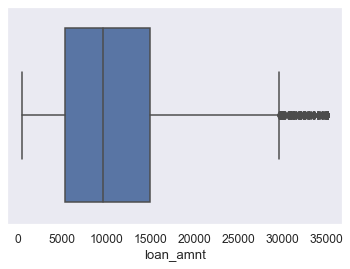

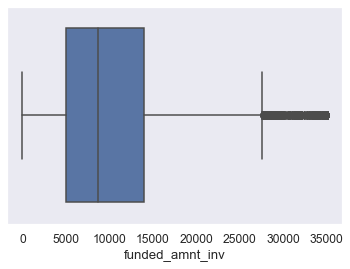

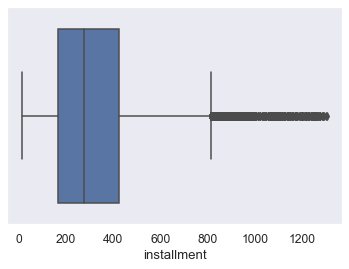

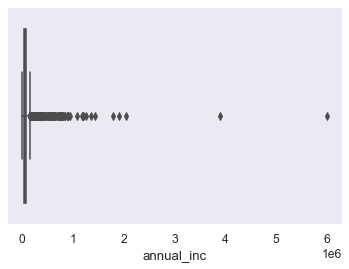

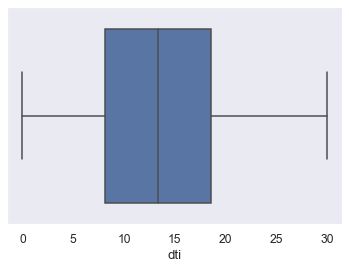

In [213]:


numerical_cols = [num for num in df_final.columns if df_final[num].dtype in ['int64' , 'float64']]

for i in numerical_cols:
    sns.boxplot(df_final[i])
    plt.show()


In [214]:
# Analysing quantiles to see the spread of data

df_final[numerical_cols].describe(percentiles = [0.1,0.2,0.25,0.5,0.6,0.75,0.9,0.95,0.98,0.99])


,loan_amnt,funded_amnt_inv,installment,annual_inc,dti
count,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000
mean,11047.025430,10222.481123,322.466318,6.877797e+04,13.272727
std,7348.441646,7022.720644,208.639215,6.421868e+04,6.673044
min,500.000000,0.000000,15.690000,4.000000e+03,0.000000
10%,3090.000000,2825.000000,98.990000,3.000000e+04,4.060000
20%,5000.000000,4375.000000,149.922000,3.719616e+04,6.910000
25%,5300.000000,5000.000000,165.740000,4.000000e+04,8.130000
50%,9600.000000,8733.440000,277.860000,5.886800e+04,13.370000
60%,11200.000000,10000.000000,327.960000,6.500400e+04,15.310000
75%,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000


In [215]:
# Removing the outliers from annual_inc

df_final = df_final[df_final.annual_inc <= df_final.annual_inc.quantile(0.95)]
# keeping upto 0.95 quantiles data points



In [216]:
df_final.annual_inc.describe()

count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

<AxesSubplot:>

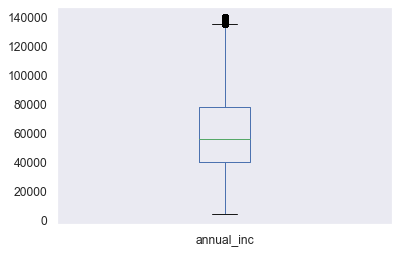

In [217]:
df_final.annual_inc.plot(kind='box')

In [218]:
# Analysing quantiles to see the spread of data

df_final[numerical_cols].describe(percentiles = [0.1,0.2,0.25,0.5,0.6,0.75,0.9,0.95,0.98,0.99])

# The columns load_amnt , fundded_amnt_inv, installment and dti contains some far values in upper quartile 
# but these values can be ignore because we can see that there is not a much diffrence between 95% and max values 

,loan_amnt,funded_amnt_inv,installment,annual_inc,dti
count,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000
mean,10682.249550,9894.181349,311.888682,60855.751621,13.446725
std,7048.414166,6730.756232,199.230096,27750.284125,6.661899
min,500.000000,0.000000,15.690000,4000.000000,0.000000
10%,3000.000000,2800.000000,97.856000,29120.000000,4.170000
20%,4950.000000,4200.000000,145.190000,36000.000000,7.140000
25%,5000.000000,4975.000000,163.080000,40000.000000,8.350000
50%,9250.000000,8375.000000,270.420000,56000.000000,13.580000
60%,10500.000000,10000.000000,320.950000,63527.200000,15.520000
75%,15000.000000,13623.731415,408.480000,77970.500000,18.710000


## Data Analysis

In [219]:
# Analysing emp_length column

df_final.emp_length.value_counts()

10+ years    8902
< 1 year     4327
2 years      4101
3 years      3824
4 years      3200
5 years      3044
1 year       3043
6 years      2073
7 years      1644
8 years      1343
9 years      1153
Name: emp_length, dtype: int64

In [220]:
# Standardizing the emp_length column

# Replacing 10+ years as  10 years of experience
# Replacing less than one year as 0 year of experience. 


df_final.emp_length.replace({'10+ years':'10 years','< 1 year':'0 year'},inplace=True)

In [221]:
df_final.emp_length.value_counts()

10 years    8902
0 year      4327
2 years     4101
3 years     3824
4 years     3200
5 years     3044
1 year      3043
6 years     2073
7 years     1644
8 years     1343
9 years     1153
Name: emp_length, dtype: int64

In [222]:
df_final['emp_length']=df_final.emp_length.str.extract('(\d+)')

# Extracting the only numbers from emp_length to make it numerical column so that we can use this col in our analysis
# \d+ is regular expression in python which extracts one or more numerical digits from text 

In [223]:
df_final.emp_length.value_counts()

10    8902
0     4327
2     4101
3     3824
4     3200
5     3044
1     3043
6     2073
7     1644
8     1343
9     1153
Name: emp_length, dtype: int64

In [224]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36654 entries, 0 to 39716
Data columns (total 17 columns):
loan_amnt              36654 non-null int64
funded_amnt_inv        36654 non-null float64
term                   36654 non-null object
int_rate               36654 non-null object
installment            36654 non-null float64
grade                  36654 non-null object
sub_grade              36654 non-null object
emp_length             36654 non-null object
home_ownership         36654 non-null object
annual_inc             36654 non-null float64
verification_status    36654 non-null object
issue_d                36654 non-null object
loan_status            36654 non-null object
purpose                36654 non-null object
title                  36643 non-null object
addr_state             36654 non-null object
dti                    36654 non-null float64
dtypes: float64(4), int64(1), object(12)
memory usage: 5.0+ MB


In [225]:
df_final.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65
1,2500,2500.0,60 months,15.27%,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20


### Data Analysis by Visualizing Data

In [56]:
df_final.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65
1,2500,2500.0,60 months,15.27%,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20


### Univariate Analysis - Categorical Variable

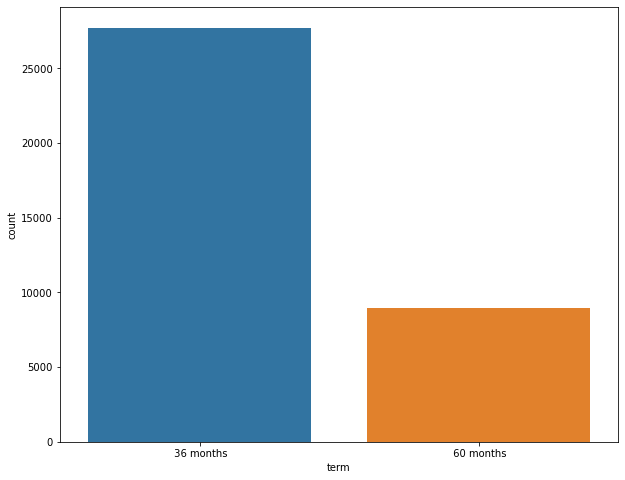

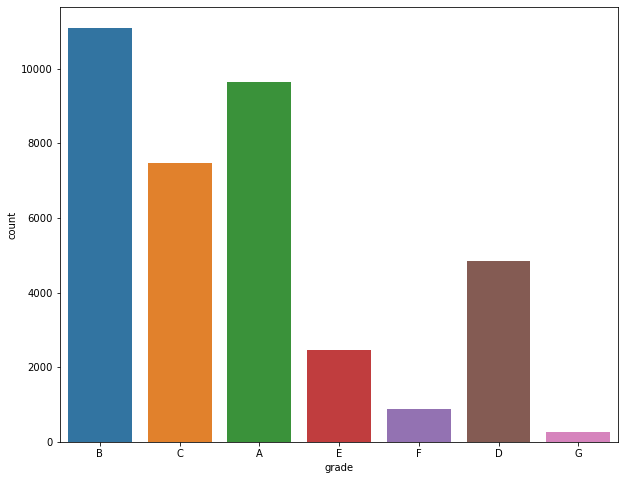

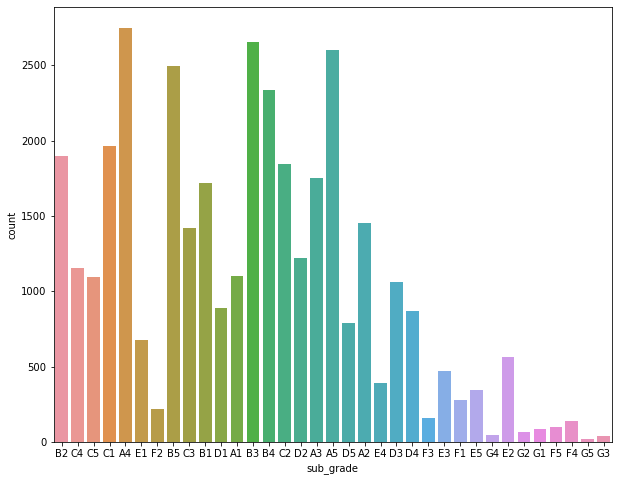

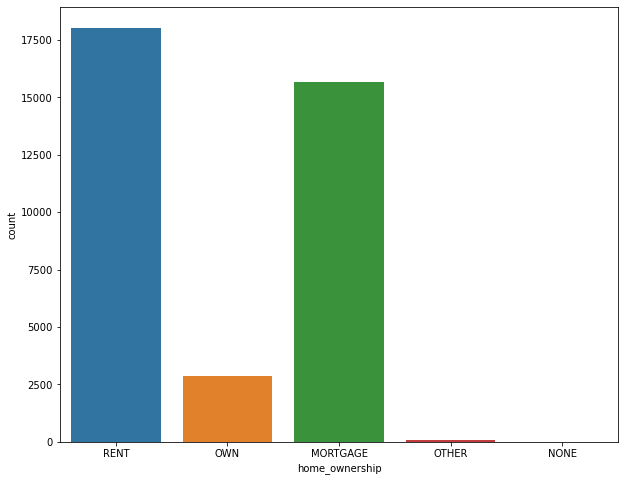

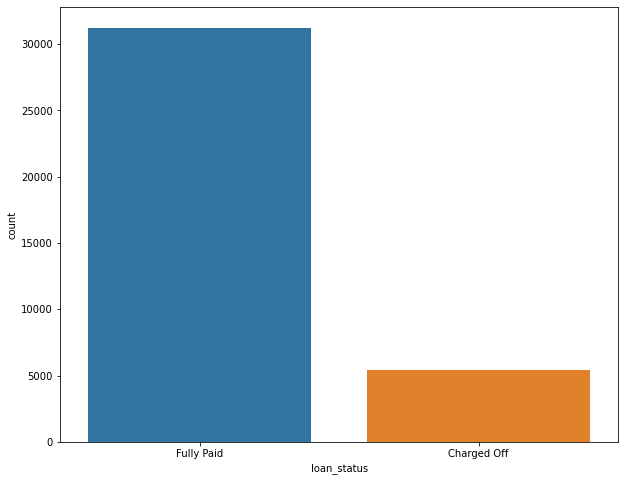

In [57]:
# we need to see those variables which have category in it and we will count these values

count_var = ['term' ,'grade' , 'sub_grade' , 'home_ownership'  , 'loan_status']
for i in count_var:
    plt.figure(figsize=(10,8))
    sns.countplot(x =df_final[i] ,  data=df_final)
    plt.show()

#### observations:

 - As seen in term variable, those people who took for 36 months are greater than 60 months
 - B and A grades are higher
 - A4, B5, B3, and A5 sub_grade are higher in size
 - People with Rent house and Mortage are higher than Owner of House
 - Fully paid are higher than charged off. 





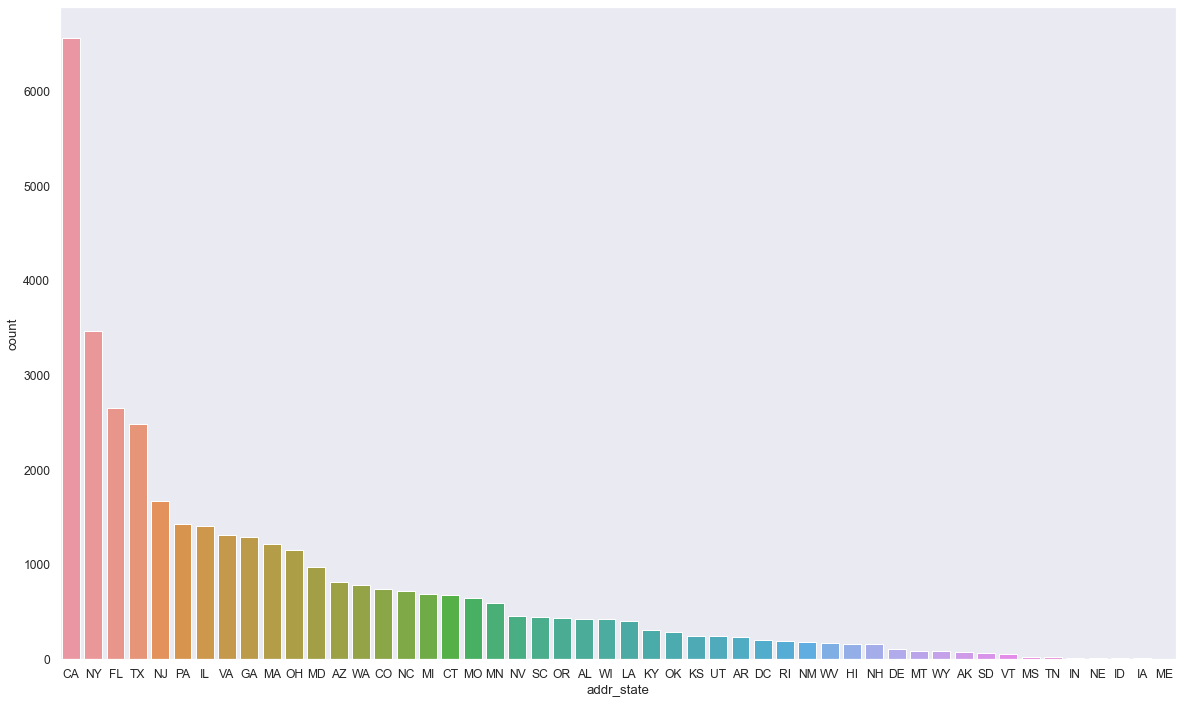

In [226]:
# Analysing state through countplot

plt.figure(figsize=(20,12))
sns.countplot(x = df_final['addr_state'] ,  data=df_final , order = df_final.addr_state.value_counts().index)
plt.show()

#### Observation:

 - CA state has the highest number of loans taken and ME has the lowest number of loans takes

In [227]:
# removing % sign from int_rate so that we can analyse int_rate with others

df_final['int_rate'] = df_final['int_rate'].str.rstrip('%')

In [229]:
# Converting all numerical column into numerical type which helps in coorealtion analysis

num_cols = ['loan_amnt','funded_amnt_inv','int_rate','installment','emp_length','annual_inc','dti']

df_final[num_cols] = df_final[num_cols].apply(pd.to_numeric)


In [230]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36654 entries, 0 to 39716
Data columns (total 17 columns):
loan_amnt              36654 non-null int64
funded_amnt_inv        36654 non-null float64
term                   36654 non-null object
int_rate               36654 non-null float64
installment            36654 non-null float64
grade                  36654 non-null object
sub_grade              36654 non-null object
emp_length             36654 non-null int64
home_ownership         36654 non-null object
annual_inc             36654 non-null float64
verification_status    36654 non-null object
issue_d                36654 non-null object
loan_status            36654 non-null object
purpose                36654 non-null object
title                  36643 non-null object
addr_state             36654 non-null object
dti                    36654 non-null float64
dtypes: float64(5), int64(2), object(10)
memory usage: 6.3+ MB


In [231]:
# Convert issue_d variable into Datetime type
# for analysis derive month and year columns separately

df_final.issue_d = pd.to_datetime(df_final.issue_d, format='%b-%y')
df_final['year']=df_final['issue_d'].dt.year
df_final['month']=df_final['issue_d'].dt.month

df_final.head(1)

# Two new columns month and year were derived from issue date

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,year,month
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,2011,12


In [232]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36654 entries, 0 to 39716
Data columns (total 19 columns):
loan_amnt              36654 non-null int64
funded_amnt_inv        36654 non-null float64
term                   36654 non-null object
int_rate               36654 non-null float64
installment            36654 non-null float64
grade                  36654 non-null object
sub_grade              36654 non-null object
emp_length             36654 non-null int64
home_ownership         36654 non-null object
annual_inc             36654 non-null float64
verification_status    36654 non-null object
issue_d                36654 non-null datetime64[ns]
loan_status            36654 non-null object
purpose                36654 non-null object
title                  36643 non-null object
addr_state             36654 non-null object
dti                    36654 non-null float64
year                   36654 non-null int64
month                  36654 non-null int64
dtypes: datetime64[ns](1), 



### Correlation and heat maps between Variables

In [233]:
df_final_cor = df_final.corr()
df_final_cor

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,year,month
loan_amnt,1.000000,0.936925,0.291189,0.931481,0.131722,0.403197,0.090313,0.105214,0.049984
funded_amnt_inv,0.936925,1.000000,0.288787,0.902641,0.144569,0.382429,0.097070,0.249812,0.066358
int_rate,0.291189,0.288787,1.000000,0.269193,-0.014069,0.054022,0.111683,0.034866,0.025095
installment,0.931481,0.902641,0.269193,1.000000,0.103221,0.398193,0.079392,0.048062,0.027053
emp_length,0.131722,0.144569,-0.014069,0.103221,1.000000,0.160975,0.052969,0.133762,0.022343
annual_inc,0.403197,0.382429,0.054022,0.398193,0.160975,1.000000,-0.072641,0.038862,0.013762
dti,0.090313,0.097070,0.111683,0.079392,0.052969,-0.072641,1.000000,0.092832,0.016215
year,0.105214,0.249812,0.034866,0.048062,0.133762,0.038862,0.092832,1.000000,-0.033750
month,0.049984,0.066358,0.025095,0.027053,0.022343,0.013762,0.016215,-0.033750,1.000000


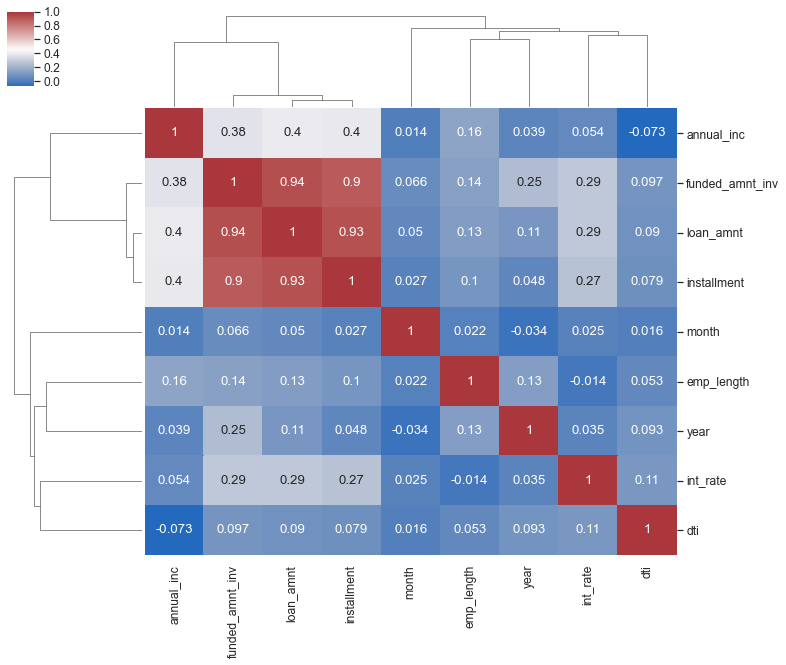

In [234]:
# By cluster maping we can visually see the correlation among numerical variables

sns.set(font_scale=1.1)
sns.clustermap(df_final_cor,annot=True,figsize=(12, 10),cmap="vlag")
plt.show()

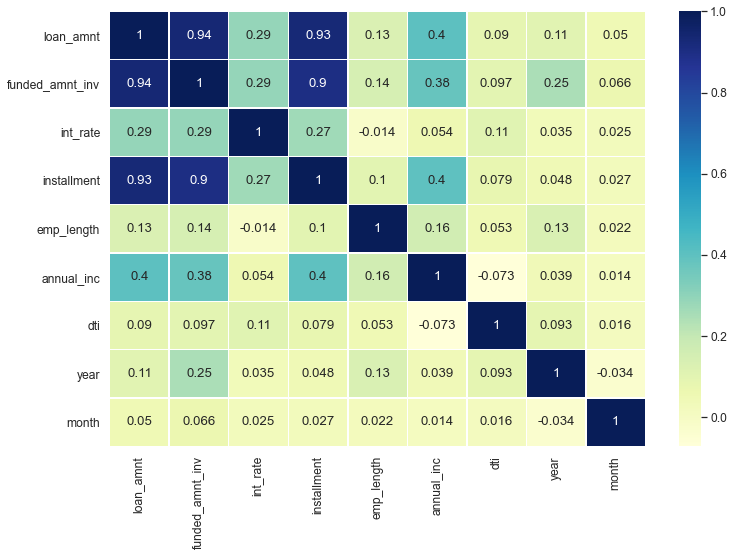

In [72]:


sns.set(font_scale=1.1)
plt.figure(figsize = (12,8))
sns.heatmap(df_final_cor,annot=True , linewidths=.5 , cmap="YlGnBu")
plt.show()

#### Observations:

 - Funded ammount , loan ammount and Installment are highly corealted with each other
 - Annual income and DTI(Debt-to-income ratio) are negatively correalted.


### Derived columns for Data Analysis

In [235]:
# check the stats for the important variables 

desc_col = ['loan_amnt' ,'annual_inc','int_rate' , 'dti']
for i in desc_col:
    print(df_final[i].describe())
    print('****************************')

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
****************************
count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64
****************************
count    36654.000000
mean        11.888080
std          3.667257
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64
****************************
count    36654.000000
mean        13.446725
std          6.661899
min          0.000000
25%          8.350000
50%         13.580000
75%         18.710000
max         29.990000
Name: dti, dtype: float64
****************************


In [236]:

# categorise loan amounts , annual_inc, int_rate and dti into bin and creating new columns accordingly
# These new columns will help in analysis further in bivariate analysis.
# pd.cut command creates equispaced bins but frequency of samples is unequal in each bin

df_final['cat_loan_amnt'] = pd.cut(df_final['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7001-14000', '14001-21000', '21001-28000', '28000 +'])


df_final['cat_annual_inc'] = pd.cut(df_final['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])


df_final['cat_int_rate'] = pd.cut(df_final['int_rate'], [0, 10, 14, 16, 20 , 24], labels=['0-9', '10-13', '14-16', '16-19' , '20 +'])


df_final['cats_dti'] = pd.cut(df_final['dti'], [0, 5, 10, 15, 20, 25 , 30], labels=['0-5', '6-10', '11-15', '16-20', '21-24' , '25 +'])


In [237]:
df_final.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,year,month,cat_loan_amnt,cat_annual_inc,cat_int_rate,cats_dti
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,2011,12,0-7000,20000-40000,10-13,25 +
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,2011,12,0-7000,20000-40000,14-16,0-5
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,2011,12,0-7000,0-20000,14-16,6-10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,2011,12,7001-14000,40000-60000,10-13,16-20
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,2011,12,0-7000,20000-40000,0-9,11-15


### Segmented Univariate Analysis 

In [76]:
df_final.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,year,month,cat_loan_amnt,cat_annual_inc,cat_int_rate,cats_dti
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,2011,12,0-7000,20000-40000,10-13,25 +
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,2011,12,0-7000,20000-40000,14-16,0-5
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,2011,12,0-7000,0-20000,14-16,6-10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,2011,12,7001-14000,40000-60000,10-13,16-20
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,2011,12,0-7000,20000-40000,0-9,11-15


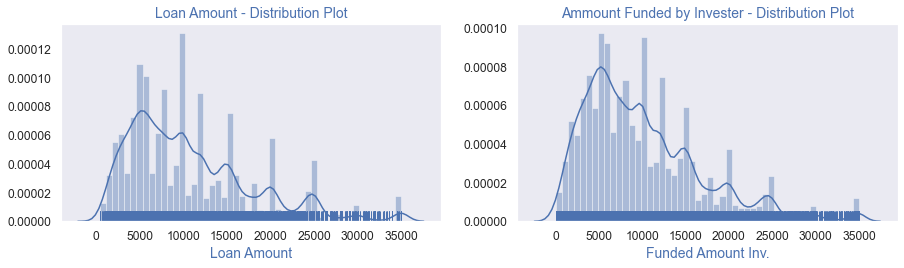

In [240]:
# Univariate Analysis on loan amount and Amount Funded using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df_final['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Loan Amount',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.distplot(df_final['funded_amnt_inv'],rug = True)
ax.set_title('Ammount Funded by Invester - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='b')
plt.show()


### Observation: 

 - Distribution of amounts for both looks very  similar.
 - Mostly ammount fall between 1000 to 20,000.

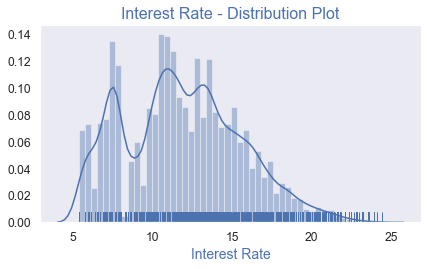

In [241]:
# Univariate Analysis on Intrest Rate using distribution plot.

plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
plt.subplot(2, 2, 2)
ax = sns.distplot(df_final['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Interest Rate',fontsize=14,color='b')
plt.show()


#### Observations:

 - Most of the Interest Rates on loans are in range of 10% - 15%

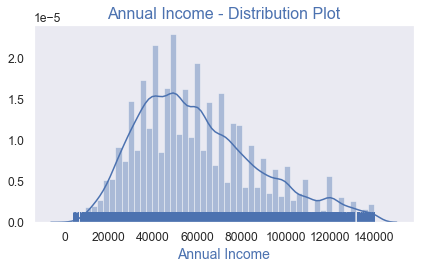

In [79]:
# Univariate Analysis on Annual Income - Numerical Variables

plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")

plt.subplot(2, 2, 1)
ax = sns.distplot(df_final['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Annual Income',fontsize=14,color='b')
plt.show()

# Observations :
# Below plot show that most of the borrower's Annual incomes are in range of 20,000- 80,000

## Bivariate Analysis

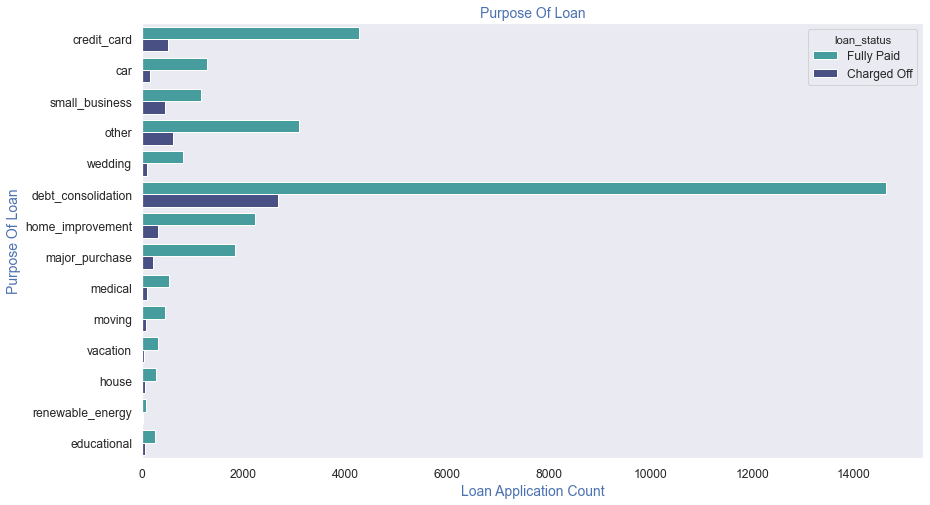

In [80]:
# Bivarite Analysis - Purposes of loan vs loan status

plt.figure(figsize=(14,8),facecolor='w')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=df_final,hue='loan_status',palette='mako_r')
ax.set_title('Purpose Of Loan',fontsize=14,color='b')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()

# Observation:
# Most of the people take loan to pay off their other loan and to pay their credit card ammount


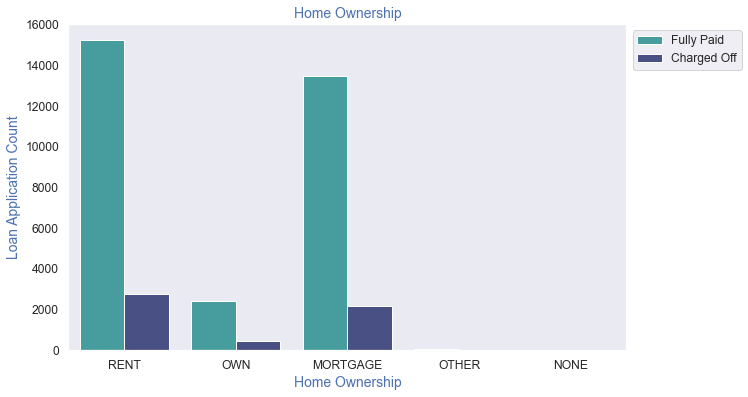

In [81]:
# Biivariate Analysis - loan Status vs Home Ownership

plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x="home_ownership",data=df_final,hue='loan_status',palette='mako_r')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='b')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()

# Observation:

# Most of the people who tool loan are living in Rent or in Mortages

In [243]:
# Loan status is our target varible
# Analysing the loan status against some important columns


# First create the charge off proportion against some important variables

# calculating the charged off proportion:

loan_vs_incrange = df_final.groupby(['cat_annual_inc', 'loan_status']).loan_status.count().unstack().reset_index()

# groupby loan status with cat_annual_inc which was derived from annual_inc column
# Count them with .count()
# Unstacking using .unstack() with default -1 level
# Index will be merge so reseting it with .reset_index 

# creating new total column in loan_vs_incrange
loan_vs_incrange['Total'] = loan_vs_incrange['Charged Off'] +  loan_vs_incrange['Fully Paid'] 

# to get the Charge off proportion divide charge off column by Total column
loan_vs_incrange['Charge Off Proportion'] = loan_vs_incrange['Charged Off'] / loan_vs_incrange['Total']

loan_vs_incrange

loan_status,cat_annual_inc,Charged Off,Fully Paid,Total,Charge Off Proportion
0,0-20000,237,943,1180,0.200847
1,20000-40000,1514,7004,8518,0.177741
2,40000-60000,1729,9534,11263,0.153511
3,60000-80000,1024,6597,7621,0.134366
4,80000 +,914,7158,8072,0.113231


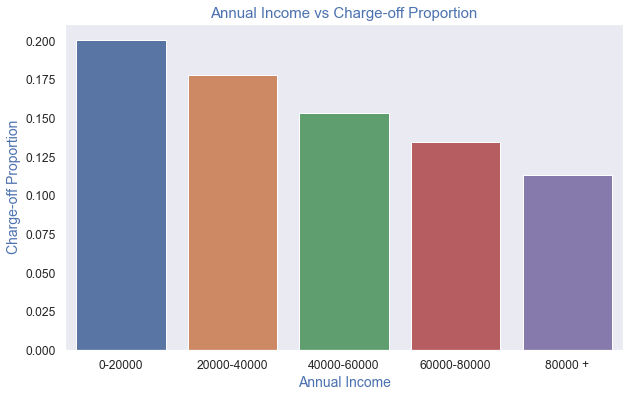

In [244]:
# Visualizing through bar-plots for loan_vs_incrange. 

plt.figure(figsize=(10,6),facecolor='w') # initializing figure size and color



ax1=sns.barplot(x='cat_annual_inc', y='Charge Off Proportion', data=loan_vs_incrange) # seaborn barplot

ax1.set_title('Annual Income vs Charge-off Proportion',fontsize=15,color = 'b') # setting title

ax1.set_ylabel('Charge-off Proportion',fontsize=14,color = 'b') # setting y label

ax1.set_xlabel('Annual Income',fontsize=14,color='b') # setting x label

plt.show()


#### Observation:

 - Annual Income are inversely coorelated to Charge off (Defaulter)
 - If the annual income is higher than there is less chance for charge off and vice versa

In [245]:
# Bivariate Analysis on purpose of Loan against Charge-off Proportion.
# Repeating same steps like in loan_vs_incrange

loan_vs_purpose = df_final.groupby(['purpose', 'loan_status']).loan_status.count().unstack().reset_index()
 
# creating new total column in loan_vs_incrange
loan_vs_purpose['Total'] = loan_vs_purpose['Charged Off'] +  loan_vs_purpose['Fully Paid'] 

# to get the Charge off proportion divide charge off column by Total column
loan_vs_purpose['Charge Off Proportion'] = loan_vs_purpose['Charged Off'] / loan_vs_purpose['Total']

loan_vs_purpose


loan_status,purpose,Charged Off,Fully Paid,Total,Charge Off Proportion
0,car,159,1289,1448,0.109807
1,credit_card,519,4264,4783,0.108509
2,debt_consolidation,2677,14628,17305,0.154695
3,educational,54,258,312,0.173077
4,home_improvement,322,2234,2556,0.125978
5,house,55,283,338,0.162722
6,major_purchase,217,1829,2046,0.106061
7,medical,104,537,641,0.162246
8,moving,90,460,550,0.163636
9,other,605,3094,3699,0.163558


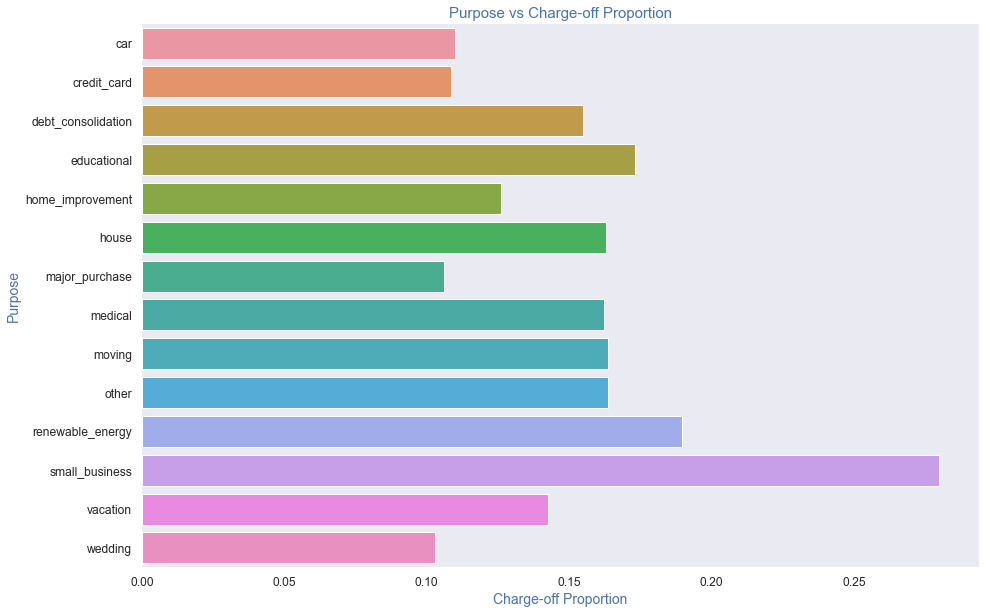

In [246]:
# bar-plots for loan_vs_purpose. 

# Initialize the matplotlib figure
fig, ax2 = plt.subplots(figsize=(15, 10),facecolor='w')

ax2=sns.barplot(x='Charge Off Proportion', y='purpose', data=loan_vs_purpose)

ax2.set_title('Purpose vs Charge-off Proportion',fontsize=15,color = 'b')

ax2.set_ylabel('Purpose',fontsize=14,color = 'b')

ax2.set_xlabel('Charge-off Proportion',fontsize=14,color='b')

sns.despine(left=True, bottom=True)

plt.show()



#### Observation:

 - Those people who have small buisnesses have higher rate of charge off
 - Similarly renewable Energy and educational sectors have high chances of charge off among others

In [249]:
# Bivariate Analysis on grade and Sub Grade against Chargedoff_Proportion

loan_vs_grade = df_final.groupby(['grade', 'loan_status']).loan_status.count().unstack().reset_index()
loan_vs_subgrade = df_final.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().reset_index()
 
# creating new total column in grade and subgrades
loan_vs_grade['Total'] = loan_vs_grade['Charged Off'] +  loan_vs_grade['Fully Paid']
loan_vs_subgrade['Total'] = loan_vs_subgrade['Charged Off'] +  loan_vs_subgrade['Fully Paid']

# to get the Charge off proportion - divide charge off column by Total column
loan_vs_grade['Charge Off Proportion'] = loan_vs_grade['Charged Off'] / loan_vs_grade['Total']
loan_vs_subgrade['Charge Off Proportion'] = loan_vs_subgrade['Charged Off'] / loan_vs_subgrade['Total']


loan_vs_subgrade
loan_vs_grade

loan_status,grade,Charged Off,Fully Paid,Total,Charge Off Proportion
0,A,593,9053,9646,0.061476
1,B,1376,9721,11097,0.123997
2,C,1325,6156,7481,0.177115
3,D,1080,3755,4835,0.223371
4,E,660,1788,2448,0.269608
5,F,289,597,886,0.326185
6,G,95,166,261,0.363985


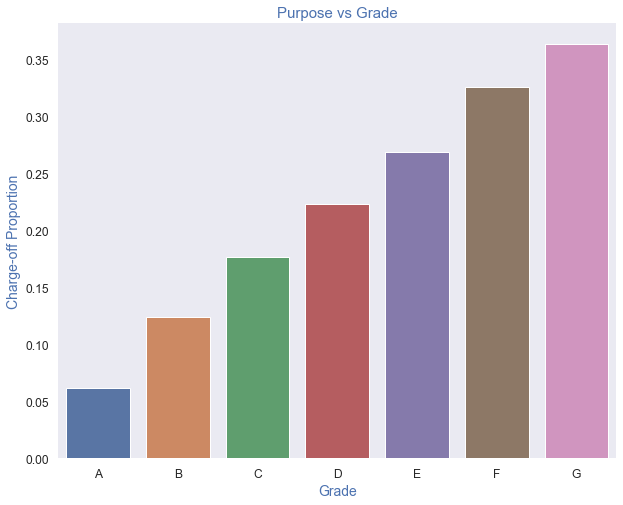

In [250]:
#bar-plots for loan_vs_grade. 


# Initialize the matplotlib figure
fig, ax2 = plt.subplots(figsize=(10, 8),facecolor='w')

ax2=sns.barplot(y='Charge Off Proportion', x='grade', data=loan_vs_grade)

ax2.set_title('Purpose vs Grade',fontsize=15,color = 'b')

ax2.set_ylabel('Charge-off Proportion',fontsize=14,color = 'b')

ax2.set_xlabel('Grade',fontsize=14,color='b')


plt.show()


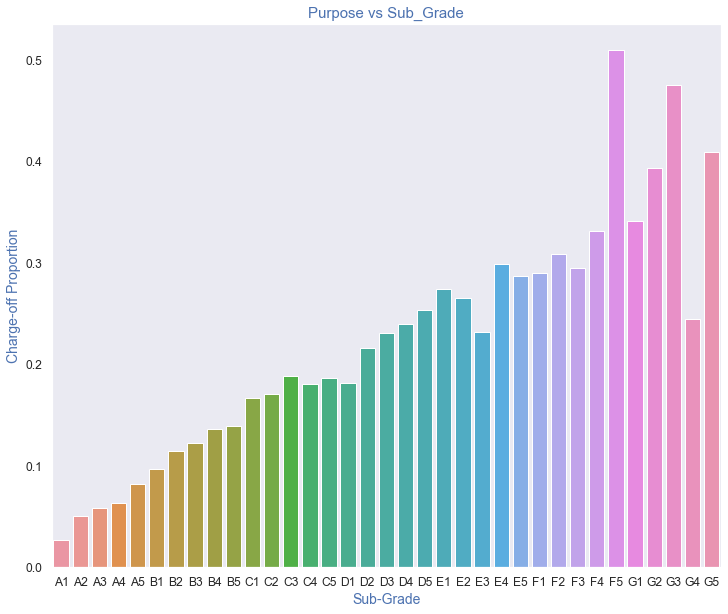

In [272]:
# Barplot for sub-grade

# Initialize the matplotlib figure
fig, ax2 = plt.subplots(figsize=(12, 10),facecolor='w')

ax2=sns.barplot(y='Charge Off Proportion', x='sub_grade', data=loan_vs_subgrade)

ax2.set_title('Purpose vs Sub_Grade',fontsize=15,color = 'b')

ax2.set_ylabel('Charge-off Proportion',fontsize=14,color = 'b')

ax2.set_xlabel('Sub-Grade',fontsize=14,color='b')


plt.show()

#### Observation:

 - Better the grade the lower the chances off defaulter
 - here A is better grade and having less chance of charge off
 - charge off increases when moving from grade A to Grade G

In [251]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

loan_vs_intrate = df_final.groupby(['cat_int_rate', 'loan_status']).loan_status.count().unstack().reset_index()
 
# creating new total column in loan_vs_intrate
loan_vs_intrate['Total'] = loan_vs_intrate['Charged Off'] +  loan_vs_intrate['Fully Paid'] 

# to get the Charge off proportion - divide charge off column by Total column
loan_vs_intrate['Charge Off Proportion'] = loan_vs_intrate['Charged Off'] / loan_vs_intrate['Total']

loan_vs_intrate.sort_values('Charge Off Proportion', ascending=False)



loan_status,cat_int_rate,Charged Off,Fully Paid,Total,Charge Off Proportion
4,20 +,266,404,670,0.397015
3,16-19,1192,3131,4323,0.275734
2,14-16,977,4007,4984,0.196027
1,10-13,2169,12681,14850,0.146061
0,0-9,812,11012,11824,0.068674


#### Observation:

 - Charging off is increasing when the intrest rate increases

In [255]:
# Bivariate Analysis on employment length against Charge off Proportion

loan_vs_emplength = df_final.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
 
# creating new total column in loan_vs_intrate
loan_vs_emplength['Total'] = loan_vs_emplength['Charged Off'] +  loan_vs_emplength['Fully Paid'] 

# to get the Charge off proportion - divide charge off column by Total column
loan_vs_emplength['Charge Off Proportion'] = loan_vs_emplength['Charged Off'] / loan_vs_emplength['Total']


loan_vs_emplength['Ratio %'] = loan_vs_emplength['Fully Paid'] / loan_vs_emplength['Charged Off']

loan_vs_emplength.sort_values('Ratio %', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Charge Off Proportion,Ratio %
9,9,150,1003,1153,0.130095,6.686667
2,2,547,3554,4101,0.133382,6.497258
4,4,443,2757,3200,0.138437,6.223476
3,3,536,3288,3824,0.140167,6.134328
6,6,294,1779,2073,0.141823,6.051020
0,0,617,3710,4327,0.142593,6.012966
8,8,194,1149,1343,0.144453,5.922680
5,5,441,2603,3044,0.144875,5.902494
1,1,449,2594,3043,0.147552,5.777283
7,7,252,1392,1644,0.153285,5.523810


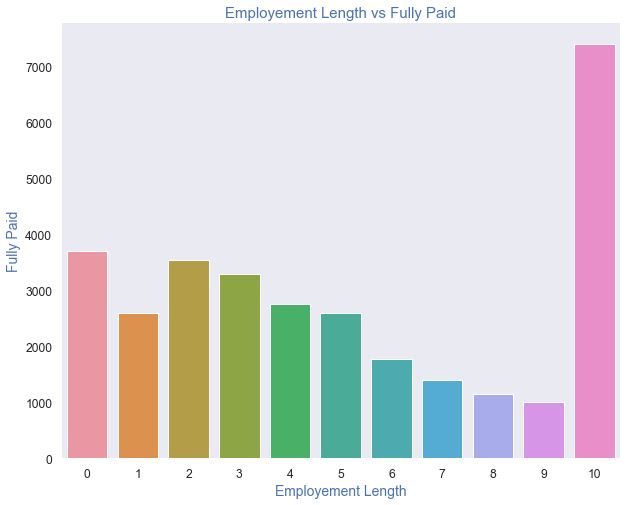

In [268]:
#bar-plots for loan_vs_emplength. 


# Initialize the matplotlib figure
fig, ax2 = plt.subplots(figsize=(10, 8),facecolor='w')

ax2=sns.barplot(y='Fully Paid', x='emp_length', data=loan_vs_emplength)

ax2.set_title('Employement Length vs Fully Paid',fontsize=15,color = 'b')

ax2.set_ylabel('Fully Paid',fontsize=14,color = 'b')

ax2.set_xlabel('Employement Length',fontsize=14,color='b')

sns.despine(left=True, bottom=True)

plt.show()


#### Observation:

  - There is consistent decreasing of Fully paying the debt when employee length in organaization increases
  - After 10 or more years of experience there is huge spike of fully paying employee

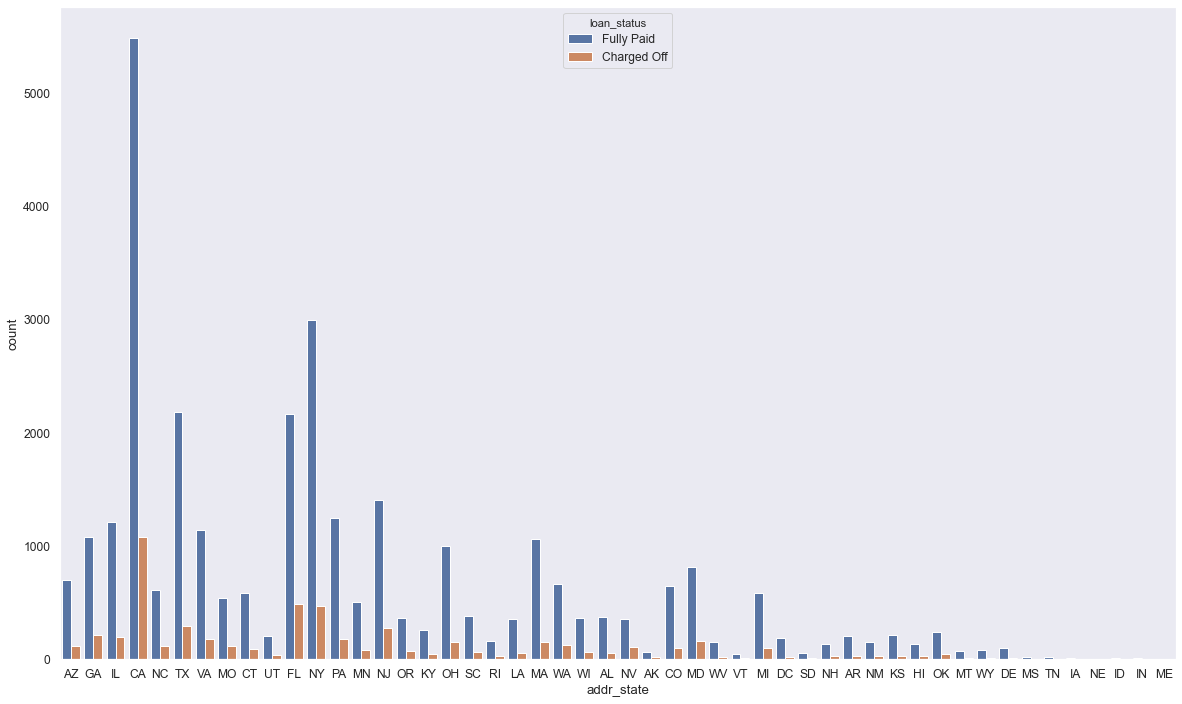

In [270]:
# Loan Status vs State
plt.figure(figsize=(20,12))
sns.countplot(x = df_final['addr_state'] ,  data=df_final , hue=df_final.loan_status)
plt.show()


#### Observation:

- Borrower from CA state have highest loan taken highest Fully paid and Highest Charge Off

## Multivariate Analysis 

### Pair Plot

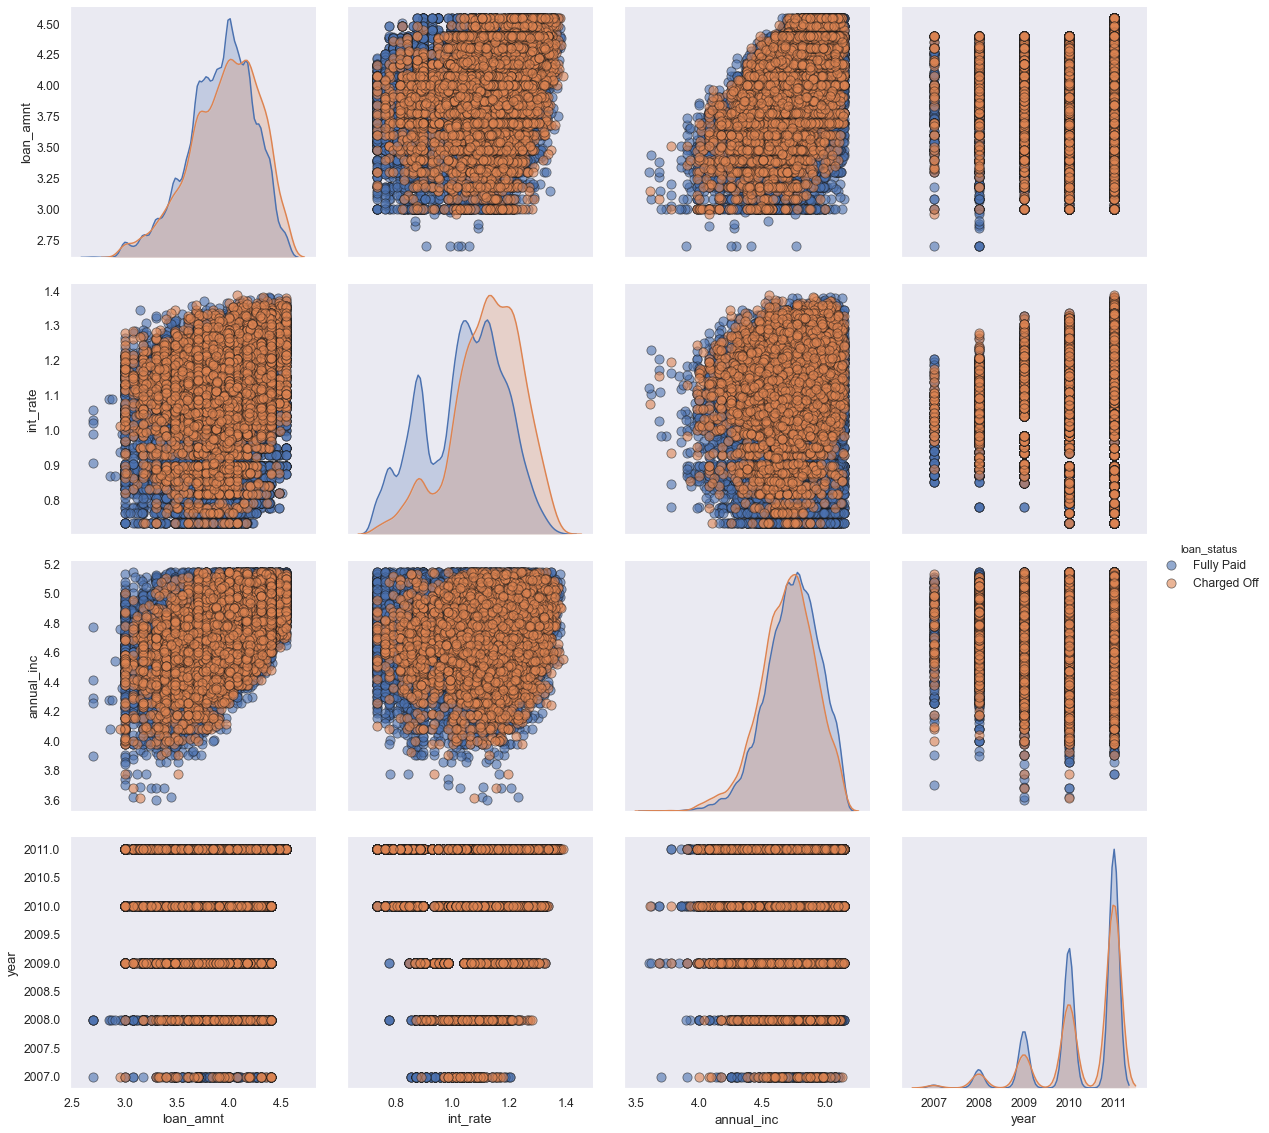

In [269]:
# Creating the pair plot from variables which are important and having corealation.

pairplt_var = df_final[['loan_amnt' , 'int_rate', 'annual_inc' , 'year' , 'loan_status']].copy()
pairplt_var.head()

# We will take the log of the following variable as they are highly skewed and can't fit into the graph
pairplt_var['loan_amnt'] = np.log10(pairplt_var['loan_amnt'])
pairplt_var['annual_inc'] = np.log10(pairplt_var['annual_inc'])
pairplt_var['int_rate'] = np.log10(pairplt_var['int_rate'])

# Creating pairplot 

sns.pairplot(pairplt_var, hue = 'loan_status', diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 85, 'edgecolor': 'k'}, height = 4)
plt.show()


#### Observation:

 - As the number of years increases loan ammount increases and charged off increases
 - Fully paid increases when int_rate is low
 - Annual Income increases Fully paid slightly increases and loan ammount also increases
 - Fully paid decreases with the passage of time
 - Intrest Rate increases as the year increases
 - Intrest Rate Increases Charge off ratio increases

## Recommendations:

#### We need to investigate from the following people as they are very high risk of charge Off:
 
      1. People with small buisness
      2. People with lower annual income
      3. People with Lower grades and Sub grades
      4. People with Renting homes
      5. People in CA state 
     
    